### Ziffern erkennen mit Neuronalen Netzen
Vereinfachtes Beispiel angelehnt an MNIST. Demonstriert Backpropagation.
Autor: Prof. Sascha Seifert

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Trainingsdaten vorbereiten

In [2]:
# Ziffernbilder
one = np.array([[0,0,1,0],[0,1,1,0],[1,0,1,0],[0,0,1,0],[0,0,1,0]])
two = np.array([[0,1,1,0],[1,0,0,1],[0,0,1,0],[0,1,0,0],[1,1,1,1]])

# Trainingsvektor
X_train = np.array([one.flatten(), two.flatten()])

# Ausgabevektor (Labels) in One-Hot-Encoding
y_train = np.array([[1, 0, 0],[0, 1, 0]])
N = y_train.size

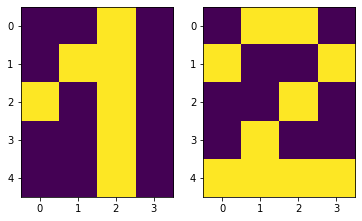

In [3]:
# Trainingsdaten anzeigen
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(one)
fig.add_subplot(1,2,2)
plt.imshow(two)
plt.show()

### Neuronales Netz erstellen 

In [4]:
# Hyperparameter 
input_size = 20
hidden_size = 10
output_size = 3
learning_rate = 0.2
num_iterations = 5000

In [5]:
# Gewichtsmatrizen mit zufälligen Werten initialisieren
np.random.seed(10)
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   
W2 = np.random.normal(scale=0.5, size=(hidden_size, output_size)) 

In [6]:
# Aktivierungsfunktion 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Layerberechnung Netzeingang und Aktivierung
def layer(W, I):
    return sigmoid(np.dot(I,W))

### Training
Verfahren: _Stochastic Gradient Descent_

Ableitung L2-Loss: y - y_train

Ableitung Sigmoid: y * (1 - y)

In [7]:
#Training
for itr in range(num_iterations): 

    # forward pass
    h1 = layer(W1, X_train)
    y = layer(W2, h1)

    # backward pass 

    # W2 Gewichtsanpassung, Loss E2 an Ausgabeschicht
    E2 = y - y_train
    dW2 = E2 * y * (1 - y) # delta rule
    W2_update = np.dot(h1.T, dW2) / N
    W2 = W2 - learning_rate * W2_update
     
    # W1 Gewichtsanpassung, Loss E1 an Hidden-Layer
    E1 = np.dot(dW2, W2.T)
    dW1 = E1 * h1 * (1 - h1)
    W1_update = np.dot(X_train.T, dW1) / N
    W1 = W1 - learning_rate * W1_update


### Test
Hat unser Netz etwas gelernt? Das testen wir mit leicht geänderten Eingabedaten.

Prädiktion: [0.92890105 0.06070552 0.0177759 ]
Prädiktion: [0.0419579  0.96363104 0.02228341]


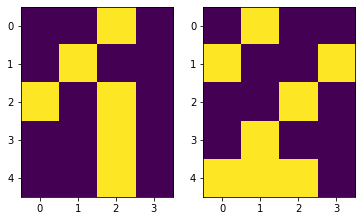

In [9]:
# Testdaten
one_test = np.array([[0,0,1,0],[0,1,0,0],[1,0,1,0],[0,0,1,0],[0,0,1,0]])
two_test = np.array([[0,1,0,0],[1,0,0,1],[0,0,1,0],[0,1,0,0],[1,1,1,0]])
X_test = np.array([one_test, two_test])

for itr in range(2):
    h1 = layer(W1, X_test[itr].flatten())
    y = layer(W2, h1)
    print("Prädiktion:", y)

# Testdaten anzeigen
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(one_test)
fig.add_subplot(1,2,2)
plt.imshow(two_test)
plt.show()